# Rinse and repeat

The visit_data.csv file contains data generated by a random data generator, and contains fake people's names, their gender, email_id, ip_address, and the number of visits they made to a particular web page.

* [Importing libraries and packages](#importing)
* [Set paths](#set-paths)
* [Loading dataset](#loading-data)
* [Wrangling](#wrangling)


<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = '../../datasets'
# Path to assets directory (for saving results to)
assets_path = '../../assets'

<a id="loading-data"></a>
## Loading dataset

In [3]:
dataset = pd.read_csv(f'{data_path}/visit_data.csv')
dataset.head()

id first_name last_name                       email gender  \
0   1      Sonny      Dahl            sdahl0@mysql.com   Male   
1   2        NaN       NaN           dhoovart1@hud.gov    NaN   
2   3        Gar     Armal      garmal2@technorati.com    NaN   
3   4    Chiarra     Nulty       cnulty3@newyorker.com    NaN   
4   5        NaN       NaN  sleaver4@elegantthemes.com    NaN   

        ip_address   visit  
0    135.36.96.183  1225.0  
1  237.165.194.143   919.0  
2   166.43.137.224   271.0  
3   139.98.137.108  1002.0  
4    46.117.117.27  2434.0

<a id="wrangling"></a>
## Wrangling

In [4]:
print("First name is duplicated - {}".format(any(dataset.first_name.duplicated())))
print("Last name is duplicated - {}".format(any(dataset.last_name.duplicated())))
print("Email is duplicated - {}".format(any(dataset.email.duplicated())))

First name is duplicated - True
Last name is duplicated - True
Email is duplicated - False


In [5]:
# Different ways to format boolean values for the % op-erator
print("The column Email contains NaN - %r " % dataset.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % dataset.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % dataset.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


In [6]:
# numpy.isfinite tests element-wise for finiteness (not infinity and not Not a Number)
# Store the previous size of the dataset for comparison with the new size
size_prev = dataset.shape
df = dataset[np.isfinite(dataset['visit'])] # This is an inplace operation.
size_after = df.shape

print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x7f72713653a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7271365a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f72713650d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7271365ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f72713791f0>],
 'means': []}

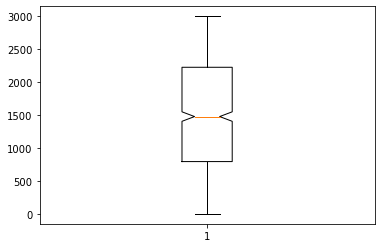

In [7]:
plt.boxplot(df.visit, notch=True)

In [8]:
# Abusing the fact the number of variables can be greater than the number of replacement
# targets
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]
print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

After getting rid of outliers the new size of the data is - 923
